# Mean Shiftアルゴリズムを用いたクラスタ数推定

Centers of clusters:
 [[2.95568966 1.95775862]
 [7.20690909 2.20836364]
 [2.17603774 8.03283019]
 [5.97960784 8.39078431]
 [4.99466667 4.65844444]]

Number of clusters in input data = 5


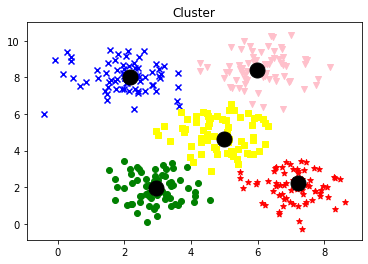

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

# ファイルを読み込む
input_file = './data/data_clustering.txt'
X = np.loadtxt(input_file, delimiter=',')

# バンド幅はMean Shiftアルゴリズムのパラメータ
# バンド幅が大きいとクラスタの幅が大きくなり、バンド幅が小さいとクラスタ数が多くなってしまう
# estimate_bandwidthはquantile（分位数）を元にバンド幅を見積もってくれる
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

# モデルを作成して訓練する。
# bin_seedingをTrueにするとクラスタを計算する時に全てのポイントではなく適度に粗いポイントを元にクラスタの計算を行う
# Trueにすると計算が早くなる
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

# クラスタの中心点を取得する
cluster_centers = meanshift_model.cluster_centers_
print('Centers of clusters:\n', cluster_centers) 

# ラベルを全て取り出して
labels = meanshift_model.labels_

# そのラベルでユニークな物の数を数える。これがクラスタ数になる
num_clusters = len(np.unique(labels))
print("\nNumber of clusters in input data =", num_clusters) 

# グラフを書く
plt.figure()
markers = 'o*xvs'
point_colors = ['green', 'red', 'blue', 'pink', 'yellow']

# zipはリストからひとつずつ取り出してくれる
for i, marker, colors in zip(range(num_clusters), markers, point_colors):
    # クラスタに属する点をそれぞれのマークで書き出す
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color=colors)

    # クラスタの中心点を描画する
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1],
                marker='o', markerfacecolor='black', markeredgecolor='black', markersize=15)

plt.title('Cluster')
plt.show()


プロットしたら、たまたまクラスタがわかるようなデータなので、うまくいったとわかる